In [1]:
import pandas as pd

In [14]:
df_demo = pd.read_csv("../data/raw/demographic.csv")
df_exam = pd.read_csv("../data/raw/examination.csv")

In [19]:
df_demo2 = df_demo[[
    "SEQN",
    "RIDAGEYR",   
    "RIAGENDR",   
    "RIDRETH3",   
    "DMDEDUC2",  
    "DMDMARTL",  
    "DMDHHSIZ",  
    "INDFMPIR"    
]].copy()

df_demo2.loc[:, "DMDEDUC2"] = df_demo2["DMDEDUC2"].fillna(df_demo2["DMDEDUC2"].mode()[0])
df_demo2.loc[:, "DMDMARTL"] = df_demo2["DMDMARTL"].fillna(df_demo2["DMDMARTL"].mode()[0])
df_demo2.loc[:, "INDFMPIR"] = df_demo2["INDFMPIR"].fillna(df_demo2["INDFMPIR"].median())

In [20]:
exam_selected = df_exam[["SEQN", "BMXBMI", "BPXSY1", "BPXDI1"]].copy()

In [21]:
df_labs = pd.read_csv("../data/raw/labs.csv")

In [22]:
df_labs.head()

,SEQN,URXUMA,URXUMS,URXUCR.x,URXCRS,URDACT,WTSAF2YR.x,LBXAPB,LBDAPBSI,LBXSAL,...,URXUTL,URDUTLLC,URXUTU,URDUTULC,URXUUR,URDUURLC,URXPREG,URXUAS,LBDB12,LBDB12SI
0,73557,4.3,4.3,39.0,3447.6,11.03,NaN,NaN,NaN,4.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,524.0,386.7
1,73558,153.0,153.0,50.0,4420.0,306.00,NaN,NaN,NaN,4.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,507.0,374.2
2,73559,11.9,11.9,113.0,9989.2,10.53,142196.890197,57.0,0.57,3.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,732.0,540.2
3,73560,16.0,16.0,76.0,6718.4,21.05,NaN,NaN,NaN,NaN,...,0.062,0.0,0.238,0.0,0.0071,0.0,NaN,3.83,NaN,NaN
4,73561,255.0,255.0,147.0,12994.8,173.47,142266.006548,92.0,0.92,4.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,225.0,166.1


In [23]:
df_labs.shape

(9813, 424)

In [24]:
df_labs.columns

Index(['SEQN', 'URXUMA', 'URXUMS', 'URXUCR.x', 'URXCRS', 'URDACT',
       'WTSAF2YR.x', 'LBXAPB', 'LBDAPBSI', 'LBXSAL',
       ...
       'URXUTL', 'URDUTLLC', 'URXUTU', 'URDUTULC', 'URXUUR', 'URDUURLC',
       'URXPREG', 'URXUAS', 'LBDB12', 'LBDB12SI'],
      dtype='object', length=424)

In [25]:
lab_candidates = [col for col in df_labs.columns
                  if any(key in col.upper() for key in ["GLU", "A1C", "HBA1C", "TC", "HDL", "LDL", "TRIG"])]
lab_candidates

['LBDLDL', 'LBDLDLSI', 'LBXTC', 'LBDTCSI']

In [26]:
labs_selected = df_labs[[
    "SEQN",
    "LBDLDL",
    "LBXTC"
]].copy()
labs_selected.head()

,SEQN,LBDLDL,LBXTC
0,73557,NaN,167.0
1,73558,NaN,170.0
2,73559,56.0,126.0
3,73560,NaN,168.0
4,73561,101.0,201.0


In [27]:
merged_full = (
    df_demo2
    .merge(exam_selected, on = "SEQN", how = "inner")
    .merge(labs_selected, on = "SEQN", how = "inner")
)

In [28]:
merged_full.shape

(9813, 13)

In [29]:
merged_full.head()

,SEQN,RIDAGEYR,RIAGENDR,RIDRETH3,DMDEDUC2,DMDMARTL,DMDHHSIZ,INDFMPIR,BMXBMI,BPXSY1,BPXDI1,LBDLDL,LBXTC
0,73557,69,1,4,3.0,4.0,3,0.84,26.7,122.0,72.0,NaN,167.0
1,73558,54,1,3,3.0,1.0,4,1.78,28.6,156.0,62.0,NaN,170.0
2,73559,72,1,3,4.0,1.0,2,4.51,28.9,140.0,90.0,56.0,126.0
3,73560,9,1,3,4.0,1.0,4,2.52,17.1,108.0,38.0,NaN,168.0
4,73561,73,2,3,5.0,1.0,2,5.00,19.7,136.0,86.0,101.0,201.0


In [31]:
merged_full.isnull().sum()

SEQN           0
RIDAGEYR       0
RIAGENDR       0
RIDRETH3       0
DMDEDUC2       0
DMDMARTL       0
DMDHHSIZ       0
INDFMPIR       0
BMXBMI       758
BPXSY1      2641
BPXDI1      2641
LBDLDL      6708
LBXTC       2189
dtype: int64

In [32]:
merged_full.loc[:, "BMXBMI"] = merged_full["BMXBMI"].fillna(merged_full["BMXBMI"].median())
merged_full.loc[:, "BPXSY1"] = merged_full["BPXSY1"].fillna(merged_full["BPXSY1"].median())
merged_full.loc[:, "BPXDI1"] = merged_full["BPXDI1"].fillna(merged_full["BPXDI1"].median())
merged_full.loc[:, "LBDLDL"] = merged_full["LBDLDL"].fillna(merged_full["LBDLDL"].median())
merged_full.loc[:, "LBXTC"] = merged_full["LBXTC"].fillna(merged_full["LBXTC"].median())

In [33]:
merged_full.isnull().sum()

SEQN        0
RIDAGEYR    0
RIAGENDR    0
RIDRETH3    0
DMDEDUC2    0
DMDMARTL    0
DMDHHSIZ    0
INDFMPIR    0
BMXBMI      0
BPXSY1      0
BPXDI1      0
LBDLDL      0
LBXTC       0
dtype: int64

In [45]:
features3 = merged_full.drop(columns=["SEQN"]).copy()
features3["RIAGENDR"] = features3["RIAGENDR"].map({1:0, 2:1})
features3 = pd.get_dummies(
    features3,
    columns = ["RIDRETH3", "DMDMARTL"],
    drop_first = True
)

In [46]:
features3.head()

,RIDAGEYR,RIAGENDR,DMDEDUC2,DMDHHSIZ,INDFMPIR,BMXBMI,BPXSY1,BPXDI1,LBDLDL,LBXTC,...,RIDRETH3_4,RIDRETH3_6,RIDRETH3_7,DMDMARTL_2.0,DMDMARTL_3.0,DMDMARTL_4.0,DMDMARTL_5.0,DMDMARTL_6.0,DMDMARTL_77.0,DMDMARTL_99.0
0,69,0,3.0,3,0.84,26.7,122.0,72.0,103.0,167.0,...,True,False,False,False,False,True,False,False,False,False
1,54,0,3.0,4,1.78,28.6,156.0,62.0,103.0,170.0,...,False,False,False,False,False,False,False,False,False,False
2,72,0,4.0,2,4.51,28.9,140.0,90.0,56.0,126.0,...,False,False,False,False,False,False,False,False,False,False
3,9,0,4.0,4,2.52,17.1,108.0,38.0,103.0,168.0,...,False,False,False,False,False,False,False,False,False,False
4,73,1,5.0,2,5.00,19.7,136.0,86.0,101.0,201.0,...,False,False,False,False,False,False,False,False,False,False


In [47]:
features3.shape

(9813, 22)

In [48]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features3 = scaler.fit_transform(features3)

scaled_df3 = pd.DataFrame(scaled_features3, columns = features3.columns)

In [49]:
scaled_df3.head()

,RIDAGEYR,RIAGENDR,DMDEDUC2,DMDHHSIZ,INDFMPIR,BMXBMI,BPXSY1,BPXDI1,LBDLDL,LBXTC,...,RIDRETH3_4,RIDRETH3_6,RIDRETH3_7,DMDMARTL_2.0,DMDMARTL_3.0,DMDMARTL_4.0,DMDMARTL_5.0,DMDMARTL_6.0,DMDMARTL_77.0,DMDMARTL_99.0
0,1.531807,-1.015508,-0.757038,-0.510511,-0.869447,0.143520,0.287286,0.482300,-0.051647,-0.318788,...,1.861320,-0.340403,-0.217436,-0.210667,-0.263035,7.421205,-0.348916,-0.207214,-0.014278,-0.010095
1,0.916959,-1.015508,-0.757038,0.069309,-0.272224,0.392024,2.483279,-0.299621,-0.051647,-0.235790,...,-0.537253,-0.340403,-0.217436,-0.210667,-0.263035,-0.134749,-0.348916,-0.207214,-0.014278,-0.010095
2,1.654776,-1.015508,0.284579,-1.090330,1.462267,0.431261,1.449871,1.889756,-2.433174,-1.453100,...,-0.537253,-0.340403,-0.217436,-0.210667,-0.263035,-0.134749,-0.348916,-0.207214,-0.014278,-0.010095
3,-0.927582,-1.015508,0.284579,0.069309,0.197931,-1.112078,-0.616946,-2.176229,-0.051647,-0.291122,...,-0.537253,-0.340403,-0.217436,-0.210667,-0.263035,-0.134749,-0.348916,-0.207214,-0.014278,-0.010095
4,1.695766,0.984729,1.326196,-1.090330,1.773585,-0.772020,1.191519,1.576988,-0.152988,0.621861,...,-0.537253,-0.340403,-0.217436,-0.210667,-0.263035,-0.134749,-0.348916,-0.207214,-0.014278,-0.010095


In [50]:
scaled_df3.shape

(9813, 22)

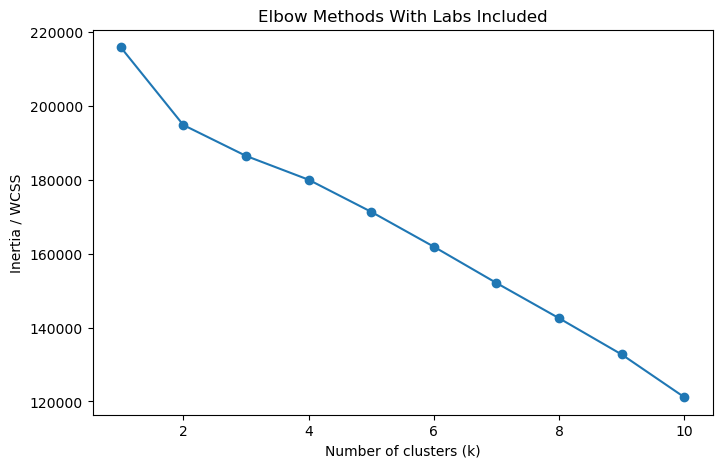

In [51]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia3 = []

for k in range(1,11):
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(scaled_df3)
    inertia3.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1,11), inertia3, marker = 'o')
plt.title("Elbow Methods With Labs Included")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia / WCSS")
plt.show()

In [52]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

for k in range(2,6):
    kmeans = KMeans(n_clusters = k, random_state = 42)
    labels = kmeans.fit_predict(scaled_df3)
    sil = silhouette_score(scaled_df3, labels)
    print(f"k={k}, silhouette score={sil}")

k=2, silhouette score=0.13677258309766127
k=3, silhouette score=0.1280318734750245
k=4, silhouette score=0.04776659098106326
k=5, silhouette score=0.061847755595211815


In [57]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture

X3 = scaled_df3

kmeans = KMeans(n_clusters = 2, random_state = 42)
kmeans_labels = kmeans.fit_predict(X3)
kmeans_sil = silhouette_score(X3, kmeans_labels)
print("KMeans silhouette score: ", kmeans_sil)

agg = AgglomerativeClustering(n_clusters = 2)
agg_labels = agg.fit_predict(X3)
agg_sil = silhouette_score(X3, agg_labels)
print("Agglomerative silhouette score: ", agg_sil)

gmm = GaussianMixture(n_components = 2, random_state = 42)
gmm_labels = gmm.fit_predict(X3)
gmm_sil = silhouette_score(X3, gmm_labels)
print("Gaussian silhouette score: ", gmm_sil)

KMeans silhouette score:  0.13677258309766127
Agglomerative silhouette score:  0.11417019136295753
Gaussian silhouette score:  0.2600529831136386


In [60]:
scaled_df3["Cluster"] = gmm_labels
scaled_df3["Cluster"].value_counts()

Cluster
1    8583
0    1230
Name: count, dtype: int64

In [62]:
cluster_profile3 = scaled_df3.groupby("Cluster").mean()
cluster_profile3

,RIDAGEYR,RIAGENDR,DMDEDUC2,DMDHHSIZ,INDFMPIR,BMXBMI,BPXSY1,BPXDI1,LBDLDL,LBXTC,...,RIDRETH3_4,RIDRETH3_6,RIDRETH3_7,DMDMARTL_2.0,DMDMARTL_3.0,DMDMARTL_4.0,DMDMARTL_5.0,DMDMARTL_6.0,DMDMARTL_77.0,DMDMARTL_99.0
Cluster,,,,,,,,,,,,,,,,,,,,,
0,1.153234,0.309852,-0.422535,-0.852274,-0.132621,0.495562,0.609176,0.287646,0.116844,0.328915,...,0.051665,-0.135189,-0.096045,1.470045,1.835468,0.940285,-0.348916,-0.207214,0.099631,0.070446
1,-0.165266,-0.044404,0.060552,0.122136,0.019005,-0.071017,-0.087299,-0.041222,-0.016745,-0.047136,...,-0.007404,0.019374,0.013764,-0.210667,-0.263035,-0.134749,0.050002,0.029695,-0.014278,-0.010095


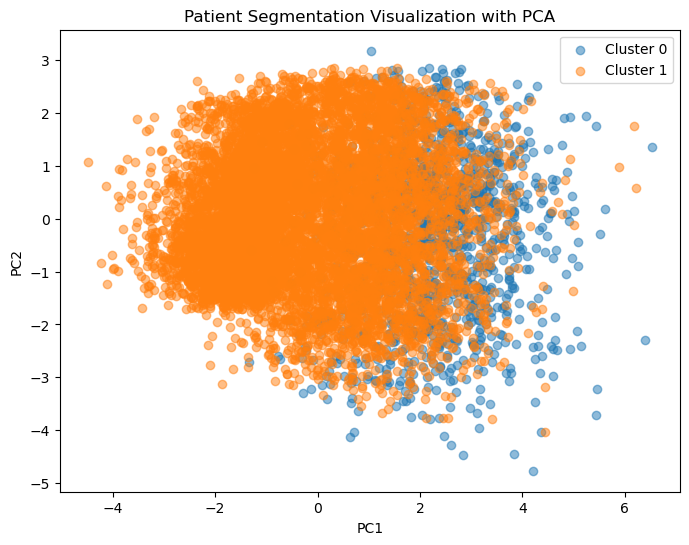

In [64]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components = 2)
pca_data3 = pca.fit_transform(scaled_df3.drop(columns = ["Cluster"]))

pca_df3 = pd.DataFrame(pca_data3, columns = ["PC1", "PC2"])
pca_df3["Cluster"] = scaled_df3["Cluster"]

plt.figure(figsize = (8,6))
plt.scatter(pca_df3[pca_df3.Cluster == 0]["PC1"], pca_df3[pca_df3.Cluster == 0]["PC2"], alpha = 0.5, label = "Cluster 0")
plt.scatter(pca_df3[pca_df3.Cluster == 1]["PC1"], pca_df3[pca_df3.Cluster == 1]["PC2"], alpha = 0.5, label = "Cluster 1")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Patient Segmentation Visualization with PCA")
plt.legend()
plt.show()